In [54]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


In [25]:
import pandas as pd

# Charger le fichier sans définir d'index
bank = pd.read_csv("data/bank.csv", sep=";")

# Nettoyer les noms de colonnes (si besoin)
bank.columns = bank.columns.str.strip().str.replace('"', '')

# Vérifier les colonnes
print(bank.columns)

# Afficher les premières lignes
print(bank.head())
bank.to_csv('data/cleaned_bank.csv', index=False)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1

In [76]:
le=LabelEncoder()
X=bank[['age','job','marital','balance','education']]
X['job']=le.fit_transform(X['job'])
X['marital']=le.fit_transform(X['marital'])
X['education']=le.fit_transform(X['education'])
Y=bank[['poutcome']]
X

C:\Users\hp\AppData\Local\Temp\ipykernel_8852\1514151866.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['job']=le.fit_transform(X['job'])
C:\Users\hp\AppData\Local\Temp\ipykernel_8852\1514151866.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['marital']=le.fit_transform(X['marital'])
C:\Users\hp\AppData\Local\Temp\ipykernel_8852\1514151866.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

,age,job,marital,balance,education
0,30,10,1,1787,0
1,33,7,1,4789,1
2,35,4,2,1350,2
3,30,4,1,1476,2
4,59,1,1,0,1
...,...,...,...,...,...
4516,33,7,1,-333,1
4517,57,6,1,-3313,2
4518,57,9,1,295,1
4519,28,1,1,1137,1


In [77]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8)

In [99]:
model=DecisionTreeClassifier(max_depth=50,criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=50)

In [100]:
pred=model.predict(x_test)
print(pred)

['unknown' 'unknown' 'unknown' 'unknown' 'unknown' 'unknown' 'unknown'
 'unknown' 'unknown' 'failure' 'failure' 'failure' 'unknown' 'unknown'
 'other' 'unknown' 'unknown' 'unknown' 'unknown' 'failure' 'failure'
 'other' 'other' 'unknown' 'failure' 'unknown' 'other' 'unknown' 'unknown'
 'unknown' 'failure' 'failure' 'failure' 'unknown' 'unknown' 'unknown'
 'unknown' 'unknown' 'unknown' 'unknown' 'unknown' 'unknown' 'unknown'
 'unknown' 'unknown' 'unknown' 'unknown' 'unknown' 'unknown' 'unknown'
 'unknown' 'failure' 'other' 'other' 'unknown' 'unknown' 'unknown'
 'unknown' 'unknown' 'unknown' 'success' 'unknown' 'unknown' 'failure'
 'failure' 'unknown' 'failure' 'unknown' 'unknown' 'failure' 'unknown'
 'unknown' 'unknown' 'success' 'failure' 'unknown' 'unknown' 'unknown'
 'failure' 'failure' 'unknown' 'unknown' 'unknown' 'other' 'unknown'
 'unknown' 'unknown' 'unknown' 'unknown' 'unknown' 'unknown' 'unknown'
 'unknown' 'unknown' 'unknown' 'unknown' 'unknown' 'unknown' 'unknown'
 'unknown'

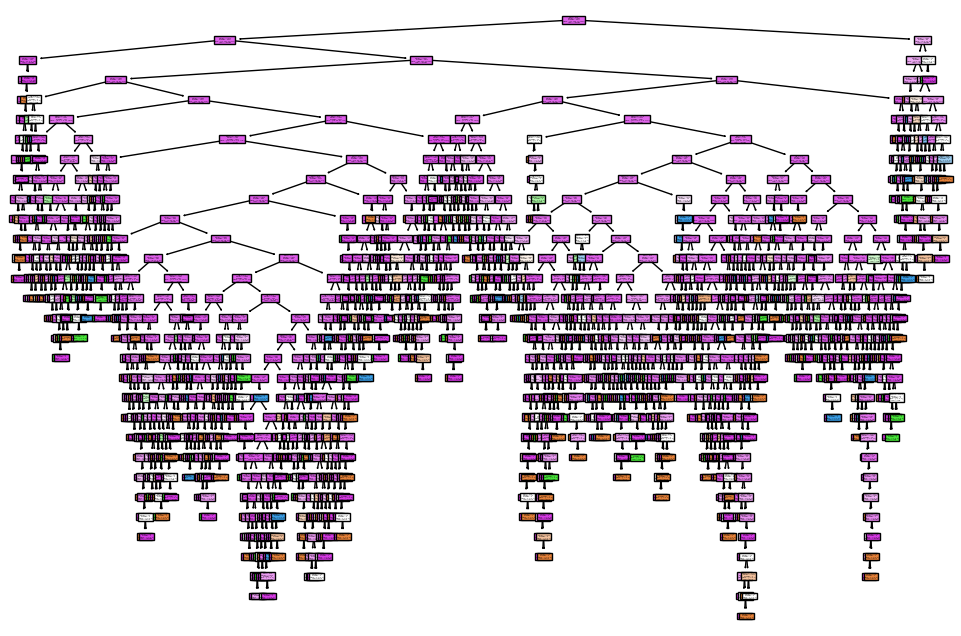

In [101]:
# Afficher l'arbre de décision
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True)
plt.show()

In [102]:
val=accuracy_score(pred,y_test)
val

0.6828729281767956

In [103]:
x_test

,age,job,marital,balance,education
2503,55,4,1,540,2
1552,33,4,2,1998,2
1073,30,4,2,726,2
349,47,6,1,2303,2
1887,33,4,1,18347,3
...,...,...,...,...,...
4213,30,9,2,-522,1
3882,38,4,1,1198,2
2569,53,9,1,4541,1
3628,29,7,1,182,1


In [104]:
model.predict([[33,	4,	1,	18347,	3]])

c:\Users\hp\Desktop\PRODIGY_DS\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['unknown'], dtype=object)